In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('../Main/main.csv')

In [3]:
df.describe()

,Adult population,Year,Number of new Limited Liability Companies,New business density rate,Economic freedom index,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Government Spending,...,Investment Freedom,Financial Freedom,Rule of Law,Government Size,Regulatory Efficiency,Open Markets,Corporate tax (Tax Foundation),Corporate tax (OECD),Global Innovation Index,median_age
count,1.951000e+03,1951.000000,1951.000000,1951.000000,1801.000000,1801.000000,514.000000,1801.000000,1801.000000,1801.000000,...,1801.000000,1801.000000,514.000000,514.000000,1801.000000,1801.000000,1841.000000,1238.000000,881.000000,1951.000000
mean,2.136167e+07,2013.239877,30447.363916,3.744813,62.963082,51.688451,50.041634,45.549250,76.619928,62.859772,...,57.945586,52.176569,51.568911,70.718502,69.317696,62.253132,23.734037,22.583720,35.968672,29.371451
std,7.630345e+07,4.187879,72537.815765,6.044536,9.564379,22.483194,18.342320,20.781466,12.831857,23.144600,...,20.845312,18.667676,17.721362,13.424868,9.379947,14.960424,8.517773,8.861874,12.774156,8.725932
min,6.367000e+03,2006.000000,2.000000,0.010000,22.100000,5.000000,11.400000,0.000000,32.710000,0.000000,...,0.000000,0.000000,17.830000,31.130000,18.430000,18.330000,0.000000,0.000000,6.000000,13.800000
25%,1.292176e+06,2010.000000,1903.500000,0.560000,56.200000,30.000000,34.700000,29.700000,69.100000,47.800000,...,45.000000,40.000000,38.670000,60.307500,63.000000,51.400000,20.000000,17.000000,28.000000,21.600000
50%,4.956123e+06,2013.000000,6817.000000,1.760000,62.900000,50.000000,48.050000,39.000000,78.500000,67.800000,...,60.000000,50.000000,47.950000,72.465000,69.800000,62.870000,25.000000,25.000000,34.900000,28.800000
75%,1.648816e+07,2017.000000,24184.500000,4.280000,69.400000,70.000000,62.600000,58.000000,85.200000,80.900000,...,75.000000,70.000000,61.722500,81.760000,75.230000,74.030000,30.000000,30.000000,43.500000,37.900000
max,9.282668e+08,2020.000000,774854.000000,82.870000,90.200000,98.400000,93.800000,97.000000,99.940000,98.530000,...,95.000000,90.000000,94.970000,94.470000,95.460000,91.670000,55.000000,48.320000,68.400000,48.000000


In [4]:
df.dtypes

id                                            object
ISO_code_alpha3                               object
Country                                       object
Adult population                               int64
Year                                           int64
Number of new Limited Liability Companies      int64
New business density rate                    float64
Economic freedom index                       float64
Property Rights                              float64
Judicial Effectiveness                       float64
Government Integrity                         float64
Tax Burden                                   float64
Government Spending                          float64
Fiscal Health                                float64
Business Freedom                             float64
Labor Freedom                                float64
Monetary Freedom                             float64
Trade Freedom                                float64
Investment Freedom                           f

In [5]:
len(df)

1951

In [6]:
df.isna().sum()

id                                              0
ISO_code_alpha3                                 0
Country                                         0
Adult population                                0
Year                                            0
Number of new Limited Liability Companies       0
New business density rate                       0
Economic freedom index                        150
Property Rights                               150
Judicial Effectiveness                       1437
Government Integrity                          150
Tax Burden                                    150
Government Spending                           150
Fiscal Health                                1437
Business Freedom                              150
Labor Freedom                                 150
Monetary Freedom                              150
Trade Freedom                                 150
Investment Freedom                            150
Financial Freedom                             150


We filter out the rows for which we don't have an economic freedom index overall score.

In [7]:
df2 = df[df['Economic freedom index'].isna() == False]

In [8]:
len(df2)

1801

In [9]:
df2.isna().sum()

id                                              0
ISO_code_alpha3                                 0
Country                                         0
Adult population                                0
Year                                            0
Number of new Limited Liability Companies       0
New business density rate                       0
Economic freedom index                          0
Property Rights                                 0
Judicial Effectiveness                       1287
Government Integrity                            0
Tax Burden                                      0
Government Spending                             0
Fiscal Health                                1287
Business Freedom                                0
Labor Freedom                                   0
Monetary Freedom                                0
Trade Freedom                                   0
Investment Freedom                              0
Financial Freedom                               0


Judicial effectiveness and fiscal health metrics were not computed until 2017.

We are missing aprox. half of the values for our scope of analysis for the global innovation index score. We decide not to use it as a main variable of our analysis, but we can still use it for checking possible patterns in the data.

In [10]:
len(df2[df2['Global Innovation Index'].isna()==True]['Country'].unique())

137

We could also use coporate tax (tax foundation).

Checking the years for which we have less information available.

In [11]:
df2.groupby('Year')['ISO_code_alpha3'].nunique()

Year
2006     91
2007     93
2008     98
2009    116
2010    116
2011    120
2012    121
2013    127
2014    132
2015    134
2016    139
2017    140
2018    142
2019    116
2020    116
Name: ISO_code_alpha3, dtype: int64

In [12]:
df2.columns

Index(['id', 'ISO_code_alpha3', 'Country', 'Adult population', 'Year',
       'Number of new Limited Liability Companies',
       'New business density rate', 'Economic freedom index',
       'Property Rights', 'Judicial Effectiveness', 'Government Integrity',
       'Tax Burden', 'Government Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom',
       'Rule of Law', 'Government Size', 'Regulatory Efficiency',
       'Open Markets', 'Corporate tax (Tax Foundation)',
       'Corporate tax (OECD)', 'Global Innovation Index', 'median_age'],
      dtype='object')

##### Correlations.

For the correlations, we do not need to filter nan values.

Economic freedom index and new business density rate.

In [13]:
cols = ['Economic freedom index', 'New business density rate']
corr_matrix = df2[cols].corr('spearman')

In [14]:
corr_matrix

,Economic freedom index,New business density rate
Economic freedom index,1.00000,0.63198
New business density rate,0.63198,1.00000


In [15]:
corr_matrix = df2.corr('spearman')

C:\Users\dcast\AppData\Local\Temp\ipykernel_12416\1998216268.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr('spearman')


In [16]:
corr_matrix

,Adult population,Year,Number of new Limited Liability Companies,New business density rate,Economic freedom index,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Government Spending,...,Investment Freedom,Financial Freedom,Rule of Law,Government Size,Regulatory Efficiency,Open Markets,Corporate tax (Tax Foundation),Corporate tax (OECD),Global Innovation Index,median_age
Adult population,1.000000,-0.002799,0.645994,-0.344767,-0.153893,-0.147474,-0.011611,-0.191542,-0.098413,0.219044,...,-0.158420,-0.015529,-0.089471,0.070929,-0.267149,-0.082353,0.245910,0.231172,-0.053240,-0.000746
Year,-0.002799,1.000000,0.058758,0.074648,0.039913,0.118366,0.019369,0.075755,0.041983,0.001137,...,0.181208,-0.037517,0.077919,0.036374,-0.033511,0.078946,-0.089298,-0.105049,-0.061630,0.084656
Number of new Limited Liability Companies,0.645994,0.058758,1.000000,0.431133,0.371459,0.362613,0.398636,0.334119,-0.143796,-0.117275,...,0.302312,0.447714,0.417558,0.003548,0.202677,0.427068,-0.019358,0.119541,0.501813,0.471718
New business density rate,-0.344767,0.074648,0.431133,1.000000,0.631980,0.607387,0.545724,0.631029,-0.105522,-0.395555,...,0.574151,0.560561,0.637059,-0.115185,0.541065,0.626087,-0.291988,-0.165619,0.624235,0.582055
Economic freedom index,-0.153893,0.039913,0.371459,0.631980,1.000000,0.813334,0.730854,0.812571,-0.010061,-0.194911,...,0.791830,0.800539,0.848304,0.227647,0.756477,0.869938,-0.284595,-0.290423,0.684354,0.601262
Property Rights,-0.147474,0.118366,0.362613,0.607387,0.813334,1.000000,0.778954,0.887886,-0.276772,-0.420308,...,0.677772,0.648800,0.936103,-0.108697,0.602950,0.716488,-0.098831,-0.028047,0.726394,0.619406
Judicial Effectiveness,-0.011611,0.019369,0.398636,0.545724,0.730854,0.778954,1.000000,0.827262,-0.177557,-0.413218,...,0.526291,0.540096,0.926823,-0.190746,0.644525,0.593089,-0.250024,-0.150386,0.738811,0.637441
Government Integrity,-0.191542,0.075755,0.334119,0.631029,0.812571,0.887886,0.827262,1.000000,-0.259206,-0.460385,...,0.658732,0.608036,0.945014,-0.156981,0.623456,0.698368,-0.131695,-0.103710,0.747484,0.647324
Tax Burden,-0.098413,0.041983,-0.143796,-0.105522,-0.010061,-0.276772,-0.177557,-0.259206,1.000000,0.371710,...,-0.222473,-0.114827,-0.163175,0.489320,0.028801,-0.163828,-0.567308,-0.527738,-0.318246,-0.152881
Government Spending,0.219044,0.001137,-0.117275,-0.395555,-0.194911,-0.420308,-0.413218,-0.460385,0.371710,1.000000,...,-0.292848,-0.278745,-0.466059,0.671735,-0.313704,-0.326483,0.128621,0.039919,-0.577183,-0.541848


Text(0, 0.5, 'New business density rate')

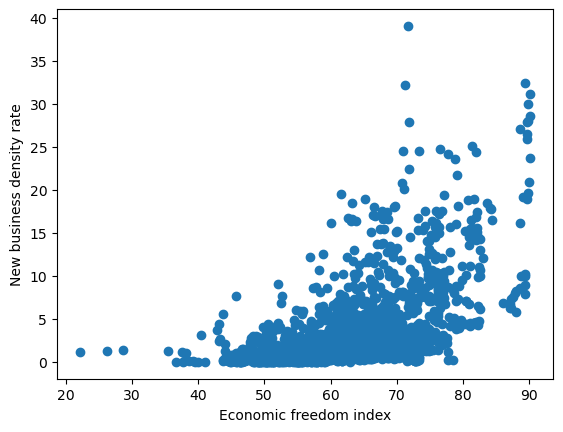

In [17]:
plt.scatter(df2['Economic freedom index'], df2['New business density rate'])
plt.xlabel('Economic freedom index')
plt.ylabel('New business density rate')

Checking linear relationship between corporate tax rates and new business density rates.

Text(0, 0.5, 'New business density rate')

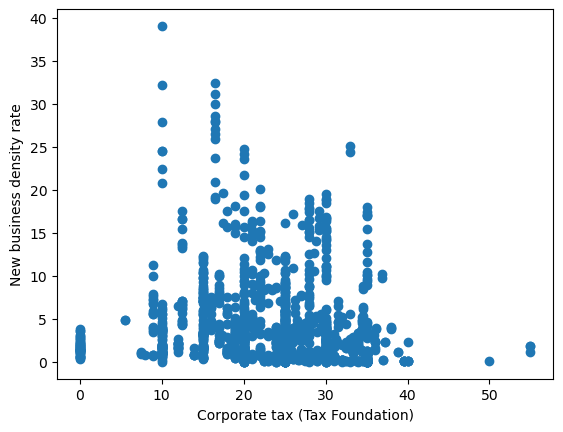

In [18]:
plt.scatter(df2['Corporate tax (Tax Foundation)'], df2['New business density rate'])
plt.xlabel('Corporate tax (Tax Foundation)')
plt.ylabel('New business density rate')

##### Hypothesis testing.

We divide de data into two categories. Lower level of economic freedom score and upper level of economic freedom score.

In [19]:
df2['Ec freedom score level'] = pd.qcut(df2['Economic freedom index'], 2, labels=['Lower level', 'Upper level'])

C:\Users\dcast\AppData\Local\Temp\ipykernel_12416\3552500013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Ec freedom score level'] = pd.qcut(df2['Economic freedom index'], 2, labels=['Lower level', 'Upper level'])


In [20]:
df2[['Economic freedom index','Ec freedom score level']].head(20)

,Economic freedom index,Ec freedom score level
8,48.90,Lower level
9,51.30,Lower level
10,60.30,Lower level
11,61.40,Lower level
12,62.35,Lower level
13,63.69,Upper level
14,66.00,Upper level
15,64.00,Upper level
16,65.10,Upper level
17,65.20,Upper level


In [21]:
df2['Ec freedom score level'].unique()

['Lower level', 'Upper level']
Categories (2, object): ['Lower level' < 'Upper level']

We use a two sample independent t-test to test our hypothesis.

We assume that the two groups are independent. There could be some variability in the composition of the groups as this is a time series. We assume that for the time span of this data, the groups can be considered independent.

In [22]:
lower = df2[df2['Ec freedom score level'] == 'Lower level']['New business density rate']
upper = df2[df2['Ec freedom score level'] == 'Upper level']['New business density rate']

**H0**: lower level new business density rate mean = upper level new business density rate mean

**H1**: lower level new business density rate mean != upper level new business density rate mean

In [23]:
t_statistic, p_value = stats.ttest_ind(lower, upper)

print("t statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("we cannot reject the null hypothesis")

t statistic: -19.94126336730862
p-value: 4.2690679238620586e-80
We reject the null hypothesis


**We can reject the null hypothesis**. We reject that the means of the groups are equal.

In [24]:
df2[df2['Ec freedom score level'] == 'Lower level']['Economic freedom index'].mean()

55.33550772626932

In [25]:
df2[df2['Ec freedom score level'] == 'Upper level']['Economic freedom index'].mean()

70.68440223463688

##### Ranking by new business density rate.

In [26]:
df2_nbd = df2.groupby('Country').agg({'New business density rate': 'mean'})

In [27]:
df2_nbd.sort_values(by='New business density rate', ascending=False)

,New business density rate
Country,
Hong Kong,25.074000
Cyprus,20.797333
New Zealand,17.962667
Estonia,16.653333
Luxembourg,14.114000
...,...
Pakistan,0.057333
Kiribati,0.049000
Haiti,0.046000


##### Ranking by new Economic freedom index.

In [28]:
df2_os = df2.groupby('Country').agg({'Economic freedom index': 'mean'})

In [29]:
df2_os.sort_values(by='Economic freedom index', ascending=False)

,Economic freedom index
Country,
Hong Kong,89.622000
Singapore,88.072667
New Zealand,82.354667
Australia,81.718000
Switzerland,80.652143
...,...
Chad,46.428571
Timor-Leste,44.880000
"Bolivia, Plurinational State of",44.100000


In [30]:
df2.head()

,id,ISO_code_alpha3,Country,Adult population,Year,Number of new Limited Liability Companies,New business density rate,Economic freedom index,Property Rights,Judicial Effectiveness,...,Financial Freedom,Rule of Law,Government Size,Regulatory Efficiency,Open Markets,Corporate tax (Tax Foundation),Corporate tax (OECD),Global Innovation Index,median_age,Ec freedom score level
8,AFG-2017,AFG,Afghanistan,19513959,2017,3022,0.15,48.90,12.6,28.4,...,0.0,22.83,89.6,61.13,22.00,20.0,NaN,NaN,16.0,Lower level
9,AFG-2018,AFG,Afghanistan,20193609,2018,4274,0.21,51.30,17.9,28.2,...,10.0,24.10,89.8,62.70,28.67,20.0,NaN,NaN,16.1,Lower level
10,ALB-2006,ALB,Albania,1960789,2006,1671,0.85,60.30,30.0,NaN,...,70.0,NaN,NaN,63.00,67.47,20.0,20.0,NaN,29.7,Lower level
11,ALB-2007,ALB,Albania,1959058,2007,2094,1.07,61.40,30.0,NaN,...,70.0,NaN,NaN,64.70,67.73,20.0,20.0,NaN,30.4,Lower level
12,ALB-2008,ALB,Albania,1955065,2008,2891,1.48,62.35,30.0,NaN,...,70.0,NaN,NaN,61.83,71.93,10.0,10.0,NaN,31.0,Lower level


In [31]:
df2.dtypes

id                                             object
ISO_code_alpha3                                object
Country                                        object
Adult population                                int64
Year                                            int64
Number of new Limited Liability Companies       int64
New business density rate                     float64
Economic freedom index                        float64
Property Rights                               float64
Judicial Effectiveness                        float64
Government Integrity                          float64
Tax Burden                                    float64
Government Spending                           float64
Fiscal Health                                 float64
Business Freedom                              float64
Labor Freedom                                 float64
Monetary Freedom                              float64
Trade Freedom                                 float64
Investment Freedom          